In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler

data=pd.read_csv('CarPrice_Assignment (1) (1).csv')
print(data.head())
print()
print(data.info())

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

In [17]:
data=data.drop(['CarName','car_ID'],axis=1)
data=pd.get_dummies(data,drop_first=True)

In [18]:
x=data.drop('price',axis=1)
y=data['price']

scaler=StandardScaler()
x=scaler.fit_transform(x)
y=scaler.fit_transform(np.array(y).reshape(-1,1))

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)



In [19]:
sgd_model=SGDRegressor(max_iter=1000,tol=1e-3)

sgd_model.fit(x_train,y_train)

y_pred=sgd_model.predict(x_test)

C:\Users\balam\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

print('Name: BALAMURUGAN S')
print('Reg. No: 212225240020')
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R2: {r2:.4f}")
print("\nModel Coefficients:")
print("Coefficients:",sgd_model.coef_)
print("Intercept:",sgd_model.intercept_)

Name: BALAMURUGAN S
Reg. No: 212225240020
MSE: 0.2123
MAE: 0.3179
R2: 0.8292

Model Coefficients:
Coefficients: [ 0.03731686  0.10769335  0.01149612  0.1798646   0.01803292  0.17405812
  0.29180049 -0.02031294 -0.08554046  0.0014624   0.10392975  0.03917901
 -0.03687461 -0.05095558 -0.01968711  0.02156738  0.01777404 -0.01828515
 -0.08747928 -0.01435642 -0.09364241 -0.03258912  0.06198538  0.21115484
  0.01393493 -0.09935054  0.07516972 -0.01654734  0.0004225   0.00987242
 -0.03750002 -0.14663458 -0.07422715  0.00088481 -0.02891852  0.00987242
 -0.00331503 -0.0148642   0.01968711 -0.01856412 -0.03333635 -0.04112085
 -0.01678116]
Intercept: [-0.01264357]


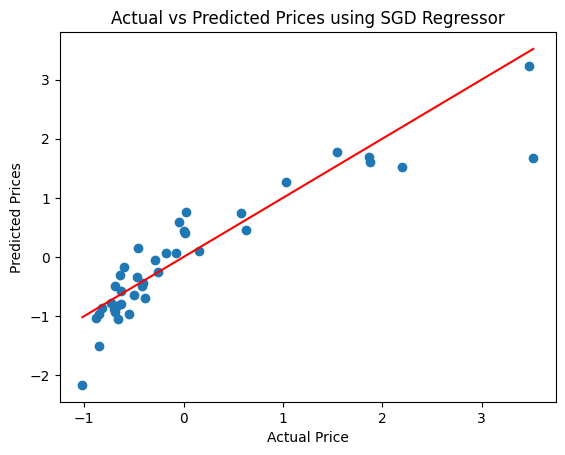

In [22]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices using SGD Regressor")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color='red')
plt.show()